In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt







In [5]:
# Load and preprocess the data
# Step 1: Inspect the data
data = pd.read_csv("C:\\Users\\Hasan\\Desktop\\data science folder\\AMZN_historical_data.csv") 
# Standardize the column names (if you want lowercase names for consistency)
data.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with invalid dates, if any
data.dropna(subset=['date'], inplace=True)

# Set 'date' as the index
data.set_index('date', inplace=True)

# Check the first few rows
print(data.head())

                open      high       low     close  adj close      volume  \
date                                                                        
1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

            dividends  stock splits  
date                                 
1997-05-15        0.0           0.0  
1997-05-16        0.0           0.0  
1997-05-19        0.0           0.0  
1997-05-20        0.0           0.0  
1997-05-21        0.0           0.0  


In [6]:
print("\nStatistical summary:")
print(data.describe())


Statistical summary:
              open         high          low        close    adj close  \
count  6846.000000  6846.000000  6846.000000  6846.000000  6846.000000   
mean     37.360464    37.801009    36.882561    37.351096    37.351096   
std      53.756955    54.366449    53.087051    53.729913    53.729913   
min       0.070313     0.072396     0.065625     0.069792     0.069792   
25%       2.070125     2.120625     2.040156     2.076750     2.076750   
50%       8.574500     8.666750     8.466500     8.591500     8.591500   
75%      50.453876    50.723249    50.059875    50.426500    50.426500   
max     200.089996   201.199997   199.050003   200.000000   200.000000   

             volume  dividends  stock splits  
count  6.846000e+03     6846.0   6846.000000  
mean   1.380713e+08        0.0      0.003944  
std    1.382346e+08        0.0      0.246789  
min    9.744000e+06        0.0      0.000000  
25%    6.505442e+07        0.0      0.000000  
50%    1.020650e+08        0.

In [7]:
# Step 2: Handle missing data
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
open            0
high            0
low             0
close           0
adj close       0
volume          0
dividends       0
stock splits    0
dtype: int64


In [8]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the count of missing values per column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
open            0
high            0
low             0
close           0
adj close       0
volume          0
dividends       0
stock splits    0
dtype: int64


In [9]:
rows_with_missing = data[data.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing)

Rows with missing values:
Empty DataFrame
Columns: [open, high, low, close, adj close, volume, dividends, stock splits]
Index: []


In [10]:
total_missing = data.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 0


In [11]:
X = data.drop(columns='adj close')  # Replace 'Outcome' with your target column
y = data['adj close']

# Handle missing values
num_imputer = SimpleImputer(strategy='mean')  # For numerical features
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical features

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, numerical_features),
        ('cat', cat_imputer, categorical_features)
    ]
)

# Apply preprocessing
X = pd.DataFrame(preprocessor.fit_transform(X), columns=numerical_features.append(categorical_features))

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete!")

Preprocessing complete!


In [12]:
# Check for missing values again after preprocessing
missing_values_after = data.isnull().sum()

# Print results
print("Missing values after preprocessing:")
print(missing_values_after)


Missing values after preprocessing:
open            0
high            0
low             0
close           0
adj close       0
volume          0
dividends       0
stock splits    0
dtype: int64


In [13]:
# Check total missing values
total_missing_after = data.isnull().sum().sum()

if total_missing_after == 0:
    print("All missing values have been filled.")
else:
    print(f"Some missing values still exist: {total_missing_after} missing values.")


All missing values have been filled.


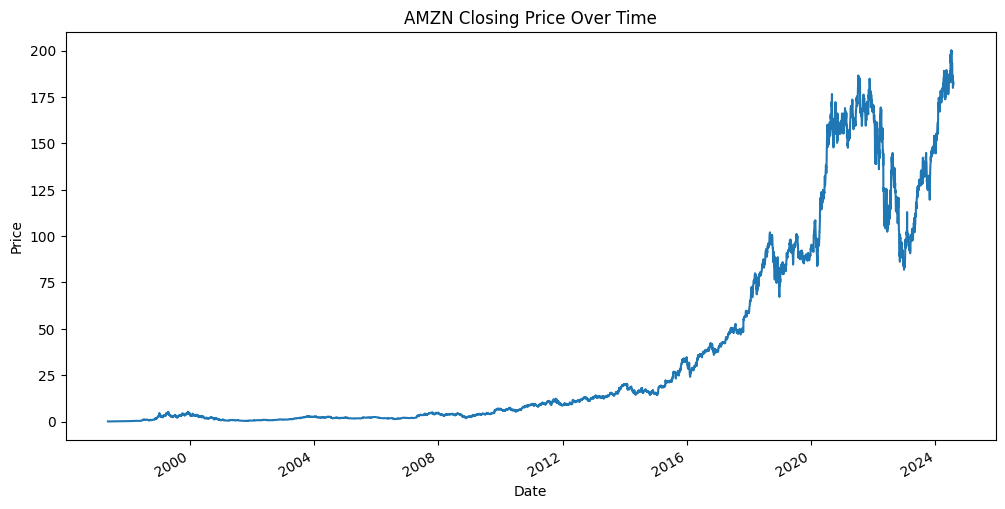

In [14]:
# Plot the closing price
plt.figure(figsize=(12, 6))
data['close'].plot(title="AMZN Closing Price Over Time", ylabel="Price", xlabel="Date")
plt.show()



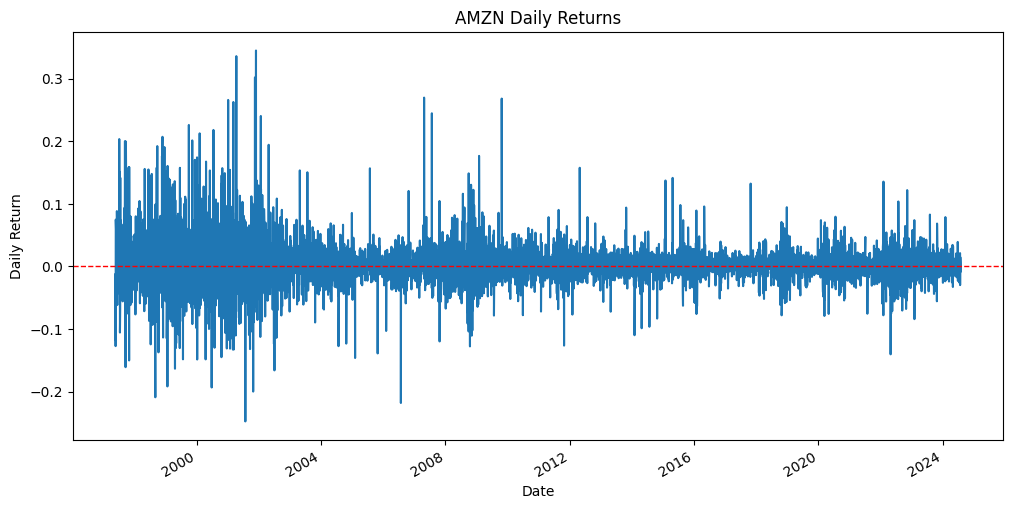

In [15]:
# Calculate daily returns
data['daily_return'] = data['close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
data['daily_return'].plot(title="AMZN Daily Returns", ylabel="Daily Return", xlabel="Date")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()


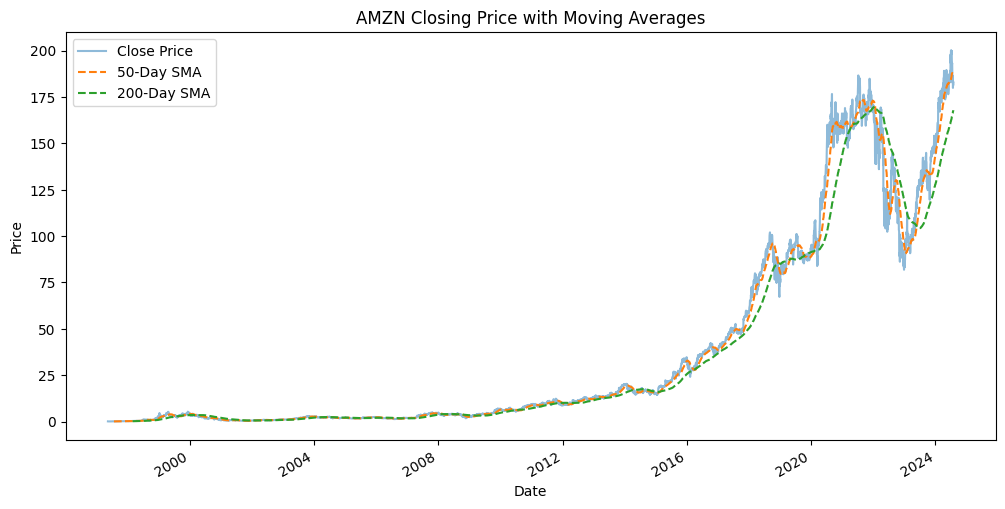

In [16]:
# Calculate 50-day and 200-day moving averages
data['SMA_50'] = data['close'].rolling(window=50).mean()
data['SMA_200'] = data['close'].rolling(window=200).mean()

# Plot the moving averages along with the close price
plt.figure(figsize=(12, 6))
data['close'].plot(label='Close Price', alpha=0.5)
data['SMA_50'].plot(label='50-Day SMA', linestyle='--')
data['SMA_200'].plot(label='200-Day SMA', linestyle='--')
plt.title("AMZN Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


#

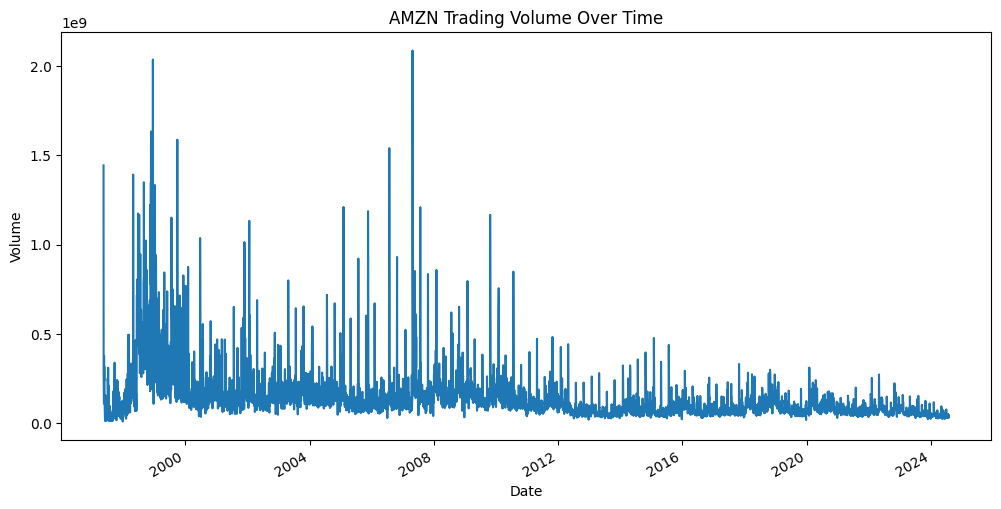

In [17]:
# Plot trading volume over time
plt.figure(figsize=(12, 6))
data['volume'].plot(title="AMZN Trading Volume Over Time", ylabel="Volume", xlabel="Date")
plt.show()


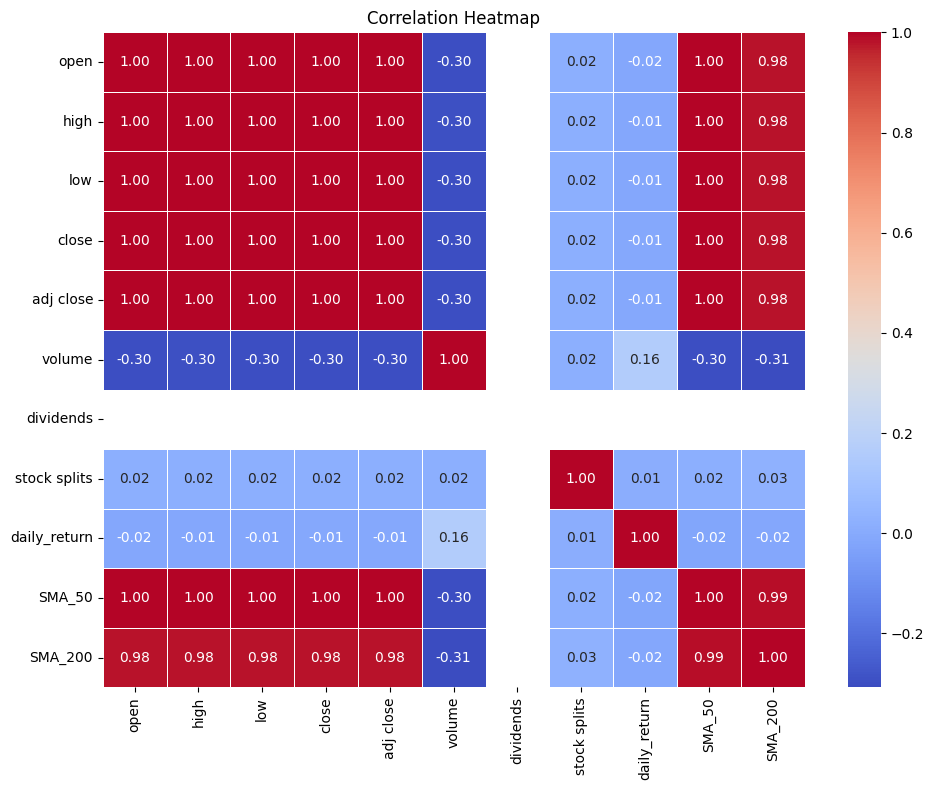

In [19]:
# Correlation heatmap for numeric columns only
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

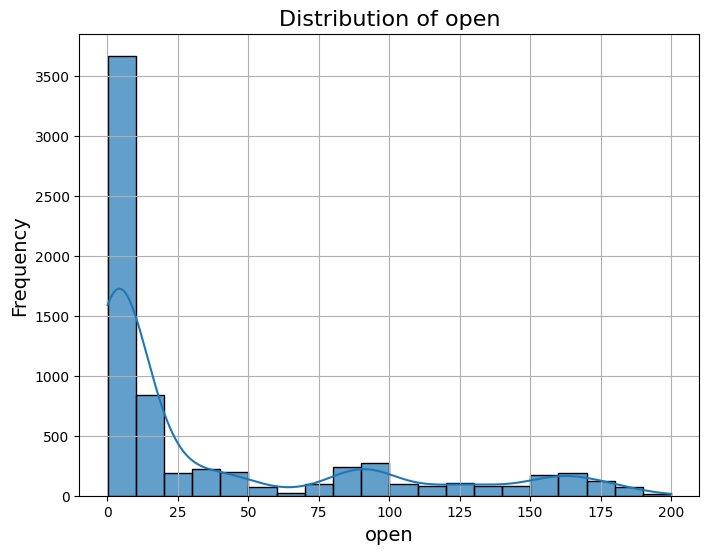

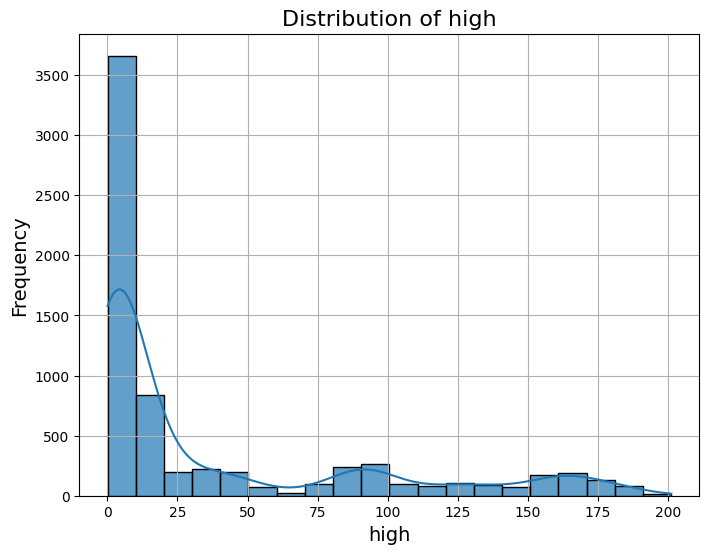

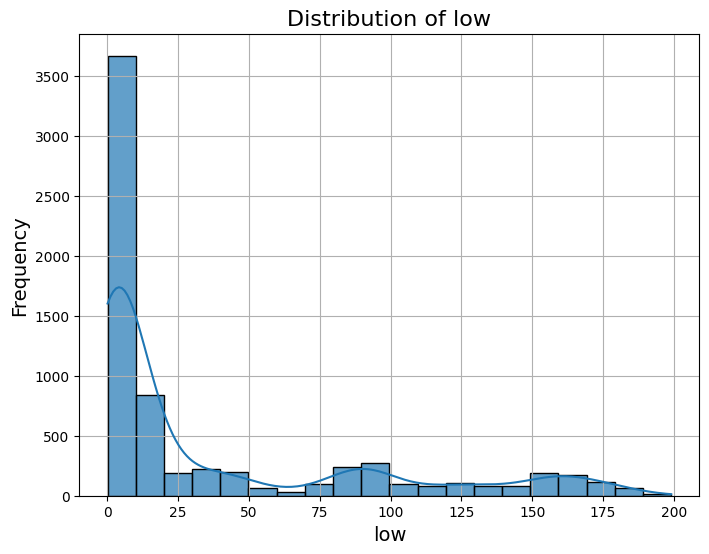

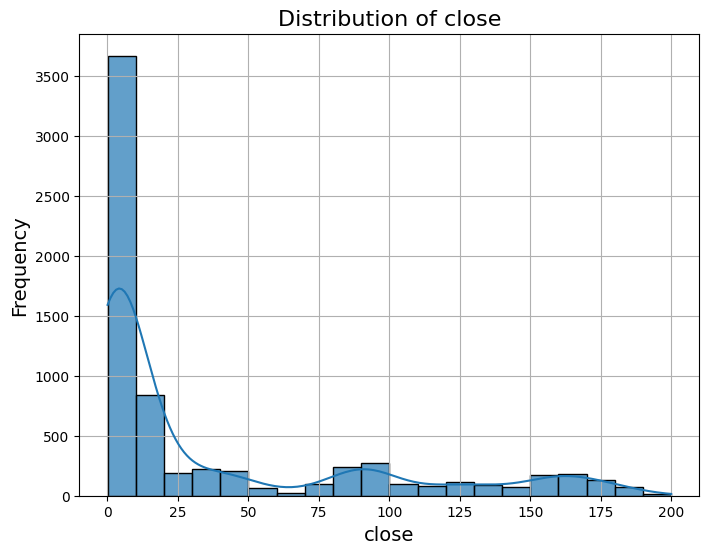

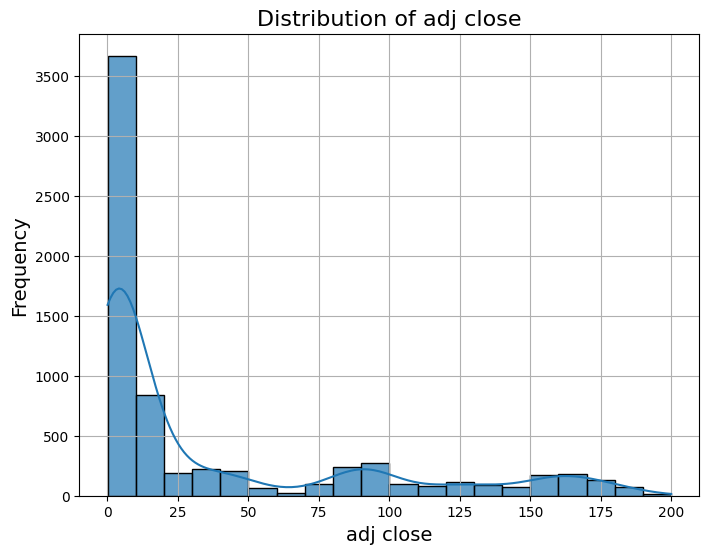

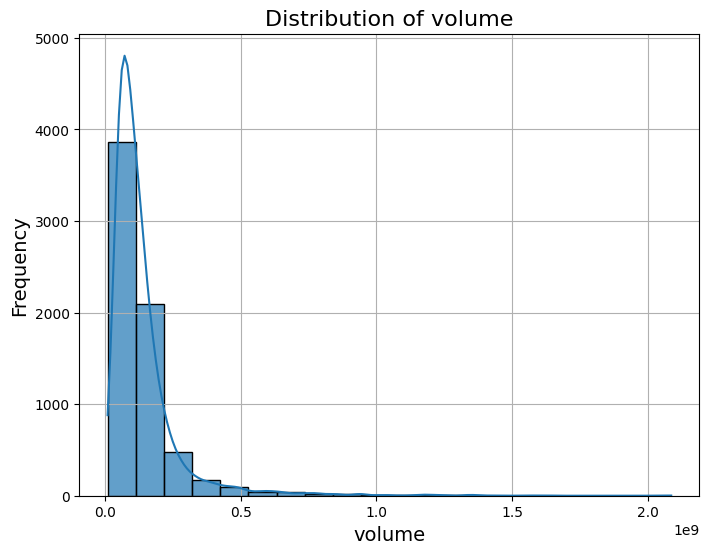

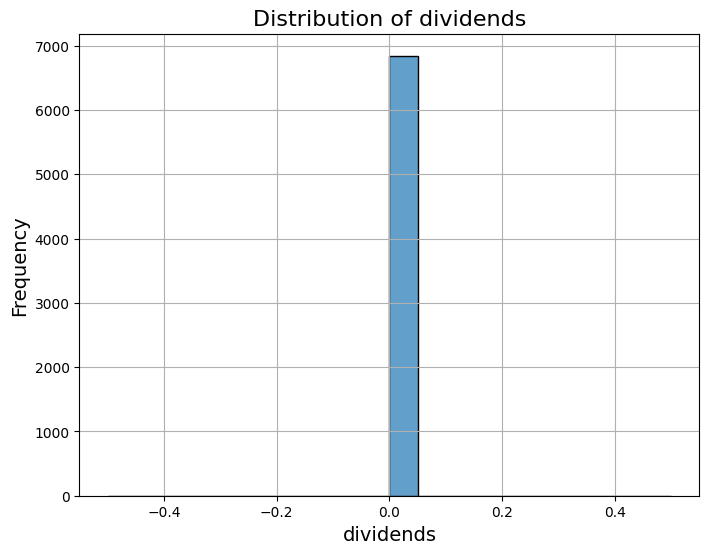

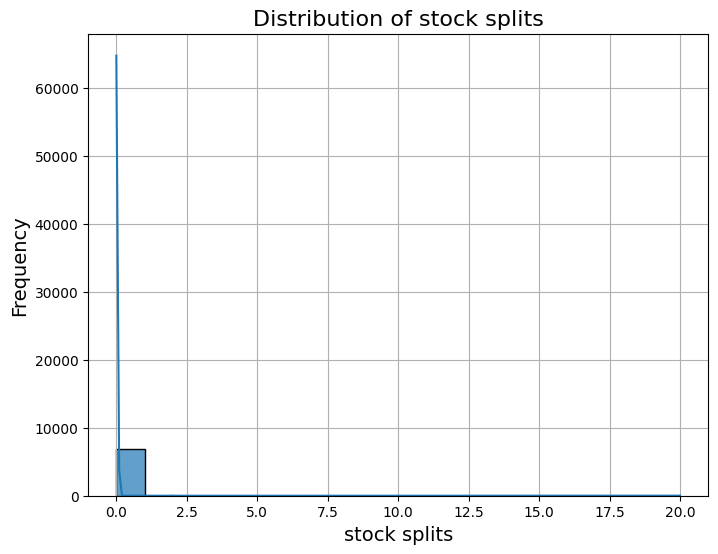

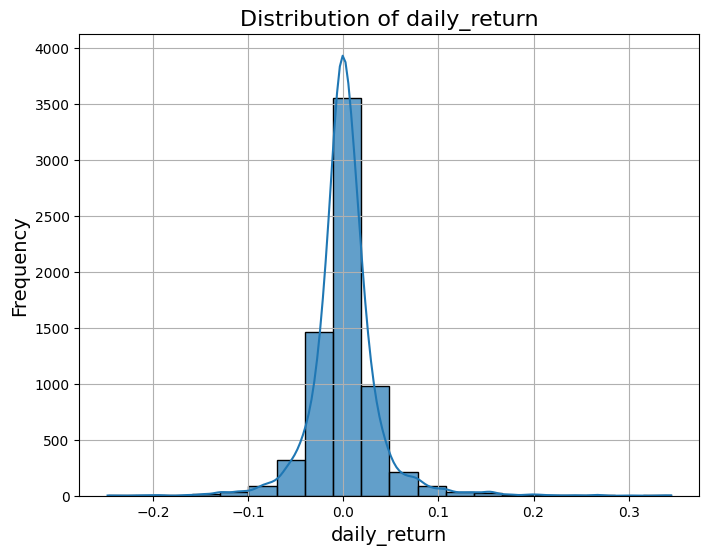

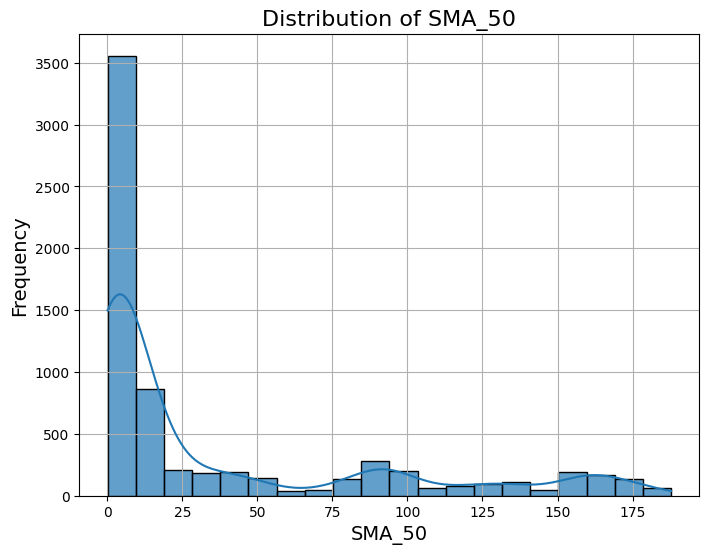

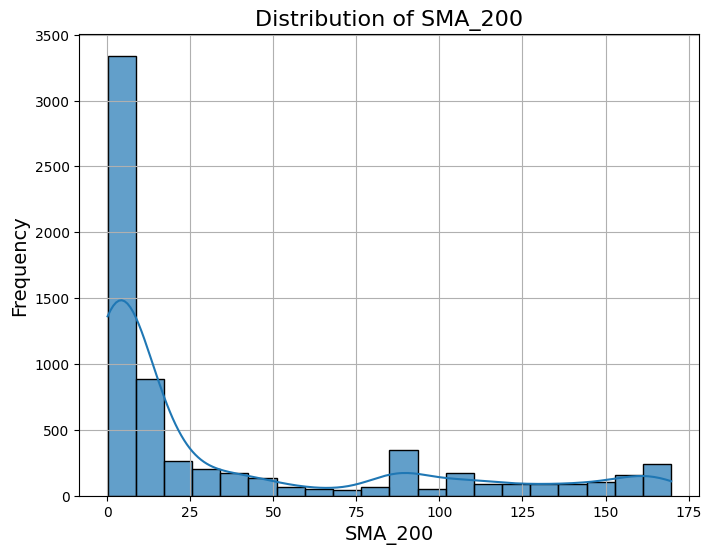

In [22]:
numeric_columns = data.select_dtypes(include=['number']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=20, alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()
